<a href="https://colab.research.google.com/github/catastropiyush/simulations/blob/main/Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install smplotlib
import smplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.1/424.1 kB 6.9 MB/s eta 0:00:00


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [82]:
# Generate data
np.random.seed(42)
X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = np.sin(3*X+np.pi/4).ravel() + np.random.normal(0, 0.4, X.shape[0])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
X_plot = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_rf = rf.predict(X_plot)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.4f}")
print(f"R-squared score: {r2:.4f}")

Mean squared error: 0.2417
R-squared score: 0.6838


In [83]:
len(X)

200

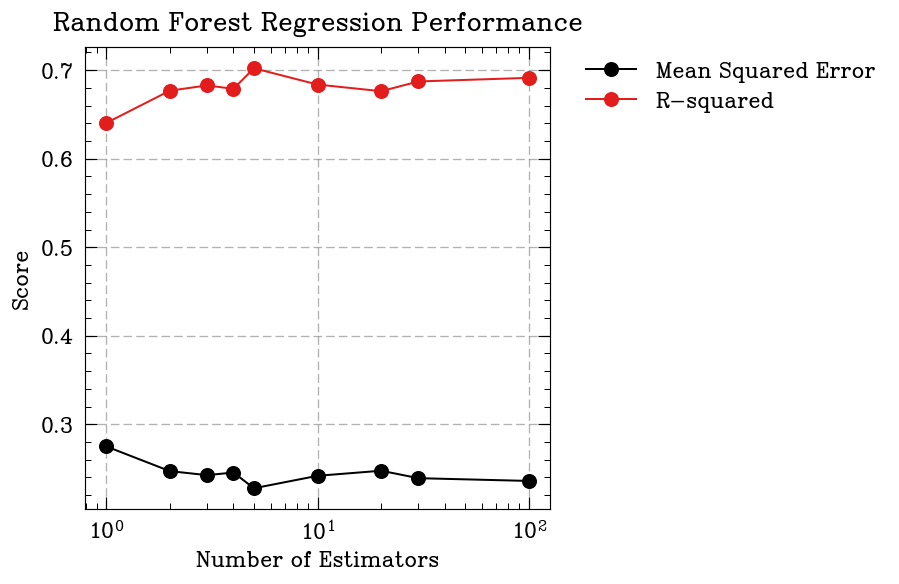

In [84]:
import matplotlib.pyplot as plt

n_estimators_values = [1,2,3,4,5,10,20,30,100]
mae_scores = []
r2_scores = []

for n_estimators in n_estimators_values:
    # Create and train the model
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mae_scores.append(mse)
    r2_scores.append(r2)

# Plot the results
plt.figure(figsize=(5,5))
plt.plot(n_estimators_values, mae_scores, marker='o', label='Mean Squared Error')
plt.plot(n_estimators_values, r2_scores, marker='o', label='R-squared')
plt.xlabel('Number of Estimators')
plt.xscale('log')
plt.ylabel('Score')
plt.title('Random Forest Regression Performance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()


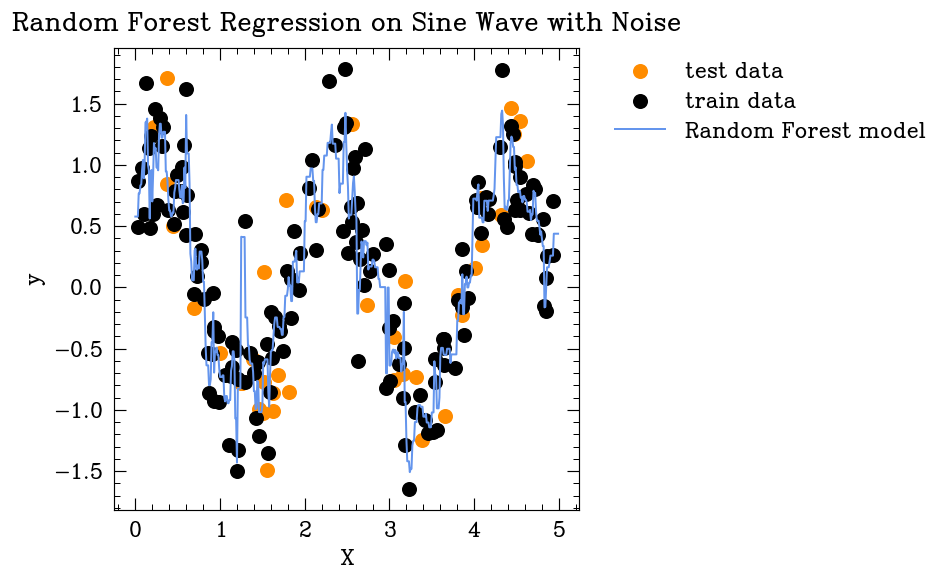

In [85]:
plt.figure(figsize=(5,5))
plt.scatter(X_test, y_test, color='darkorange', label='test data')
plt.scatter(X_train, y_train, color='black', label='train data')
plt.plot(X_plot, y_rf, color='cornflowerblue', label='Random Forest model')
#plt.plot(X_plot, np.sin(X_plot), color='green', label='True sine function')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Random Forest Regression on Sine Wave with Noise')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [86]:
output = rf.predict([[2.0]])
output

array([0.60458382])